# Selenium Basic

https://www.selenium.dev/documentation/

[1. selenium webdriver 사용하기](#1) <br>
&emsp;    - [화면 최대 크기 설정](#화면-최대-크기-설정)<br>
&emsp;    - [화면 최소 크기 설정](#화면-최소-크기-설정)<br>
&emsp;    - [화면 크기 설정](#화면-크기-설정)<br>
&emsp;    - [새로고침](#새로고침)<br>
&emsp;    - [뒤로가기](#뒤로가기)<br>
&emsp;    - [앞으로 가기](#앞으로-가기)<br>
&emsp;    - [클릭](#클릭)<br>
&emsp;    - [새로운 탭 생성](#새로운-탭-생성)<br>
&emsp;    - [탭 이동](#탭-이동)<br>
&emsp;    - [탭 개수](#탭-개수)<br>
&emsp;    - [탭 닫기](#탭-닫기)<br>
&emsp;    - [driver 닫기](#driver-닫기)<br>
[2. 화면 스크롤](#화면-스크롤) <br>
&emsp;    - [화면 스크롤 하단 이동](#화면-스크롤-하단-이동)<br>
&emsp;    - [현재 보이는 화면 스크린샷 저장](#현재-보이는-화면-스크린샷-저장)<br>
&emsp;    - [화면 스크롤 상단 이동](#화면-스크롤-상단-이동)<br>
&emsp;    - [특정 태그 지점까지 스크롤 이동](#특정-태그-지점까지-스크롤-이동)<br>
[3. 검색어 입력](#검색어-입력) <br>
&emsp;    - [CSS_SELECTOR](#CSS-SELECTOR)<br>
&emsp;    - [XPATH](#XPATH)<br>
&emsp;    - [PinkWink 웹사이트 검색 연습(ActionChains)](#ActionChains)<br>
[4. Selenium + BeautifulSoup](#selenium-beautifulsoup)<br>
&emsp;    - [현재 화면의 html 코드 가져오기](#현재-화면-html)<br>
&emsp;    - [BeautifulSoup 으로 html parsing](#html-parsing)<br>

[Github에서는 toc가 작동안함. nbviewer로 보기👀](https://nbviewer.org/github/solpinetree/ds_study/blob/main/source_code/04.%20Selenium_Basic_1.ipynb)

<a id="1"></a>
## 1. selenium webdriver 사용하기

In [32]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://pinkwink.kr")

<a id="화면-최대-크기-설정"></a>
### 화면 최대 크기 설정

In [6]:
driver.maximize_window()

<a id="화면-최소-크기-설정"></a>
### 화면 최소 크기 설정

In [5]:
driver.minimize_window()

<a id="화면-크기-설정"></a>
### 화면 크기 설정

In [7]:
driver.set_window_size(600, 600)

<a id="새로고침"></a>
### 새로고침

In [8]:
driver.refresh()

<a id="뒤로가기"></a>
### 뒤로가기

In [9]:
driver.back()

<a id="앞으로-가기"></a>
### 앞으로 가기

In [10]:
driver.forward()

<a id="클릭"></a>
### 클릭

In [13]:
first_content = driver.find_element(By.CSS_SELECTOR, '#content > div.cover-masonry > div > ul > li:nth-child(1)')
first_content.click()

<a id="새로운-탭-생성"></a>
### 새로운 탭 생성

In [23]:
driver.execute_script('window.open("https://www.naver.com")')

<a id="탭-이동"></a>
### 탭 이동

In [30]:
driver.switch_to.window(driver.window_handles[0])

<a id="탭-개수"></a>
### 탭 개수

In [24]:
len(driver.window_handles)

4

<a id="탭-닫기"></a>
### 탭 닫기

In [29]:
driver.close()

<a id="driver-닫기"></a>
### driver 닫기

In [42]:
driver.quit()

---

<a id="화면-스크롤"></a>
## 2. 화면 스크롤

In [34]:
# 스크롤 가능한 높이(길이)
# 자바스크립트 코드 실행
driver.execute_script('return document.body.scrollHeight')

5809

<a id="화면-스크롤-하단-이동"></a>
### 화면 스크롤 하단 이동

In [35]:
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

<a id="현재-보이는-화면-스크린샷-저장"></a>
### 현재 보이는 화면 스크린샷 저장

In [36]:
driver.save_screenshot('./last_height.png')

True

<a id="화면-스크롤-상단-이동"></a>
### 화면 스크롤 상단 이동

In [38]:
driver.execute_script('window.scrollTo(0, 0);')

<a id="특정-태그-지점까지-스크롤-이동"></a>
### 특정 태그 지점까지 스크롤 이동

In [39]:
from selenium.webdriver import ActionChains

some_tag = driver.find_element(By.CSS_SELECTOR, "#content > div.cover-list > div > ul > li:nth-child(1)")
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

---

<a id="검색어-입력"></a>
## 3. 검색어 입력

In [41]:
from selenium import webdriver
from selenium.webdriver.common.by import By

<a id="CSS-SELECTOR"></a>
### CSS_SELECTOR

In [46]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com")

In [48]:
keyword = driver.find_element(By.CSS_SELECTOR, '#query')
keyword.clear()
keyword.send_keys('파이썬')

In [49]:
search_btn = driver.find_element(By.CSS_SELECTOR, '#sform > fieldset > button')
search_btn.click()

<a id="XPATH"></a>
### XPATH
- '//' : 최상위
- '*' : 자손 태그
- '/' : 자식 태그

div[2] 와 같이 자식 태그 중 하나의 태그만 선택하는 상황과 <br>
input[value>=30] 과 같이 원하는 범위의 값을 가진 태그를 선택해야할 때
css_selector 보다 xpath가 편하다

In [50]:
keyword = driver.find_element(By.XPATH, '//*[@id="query"]')
keyword.clear()
keyword.send_keys('파이썬')

In [51]:
search_btn = driver.find_element(By.XPATH, '//*[@id="sform"]/fieldset/button')
search_btn.click()

In [52]:
driver.quit()

<a id="ActionChains"></a>
### PinkWink 웹사이트 검색 연습
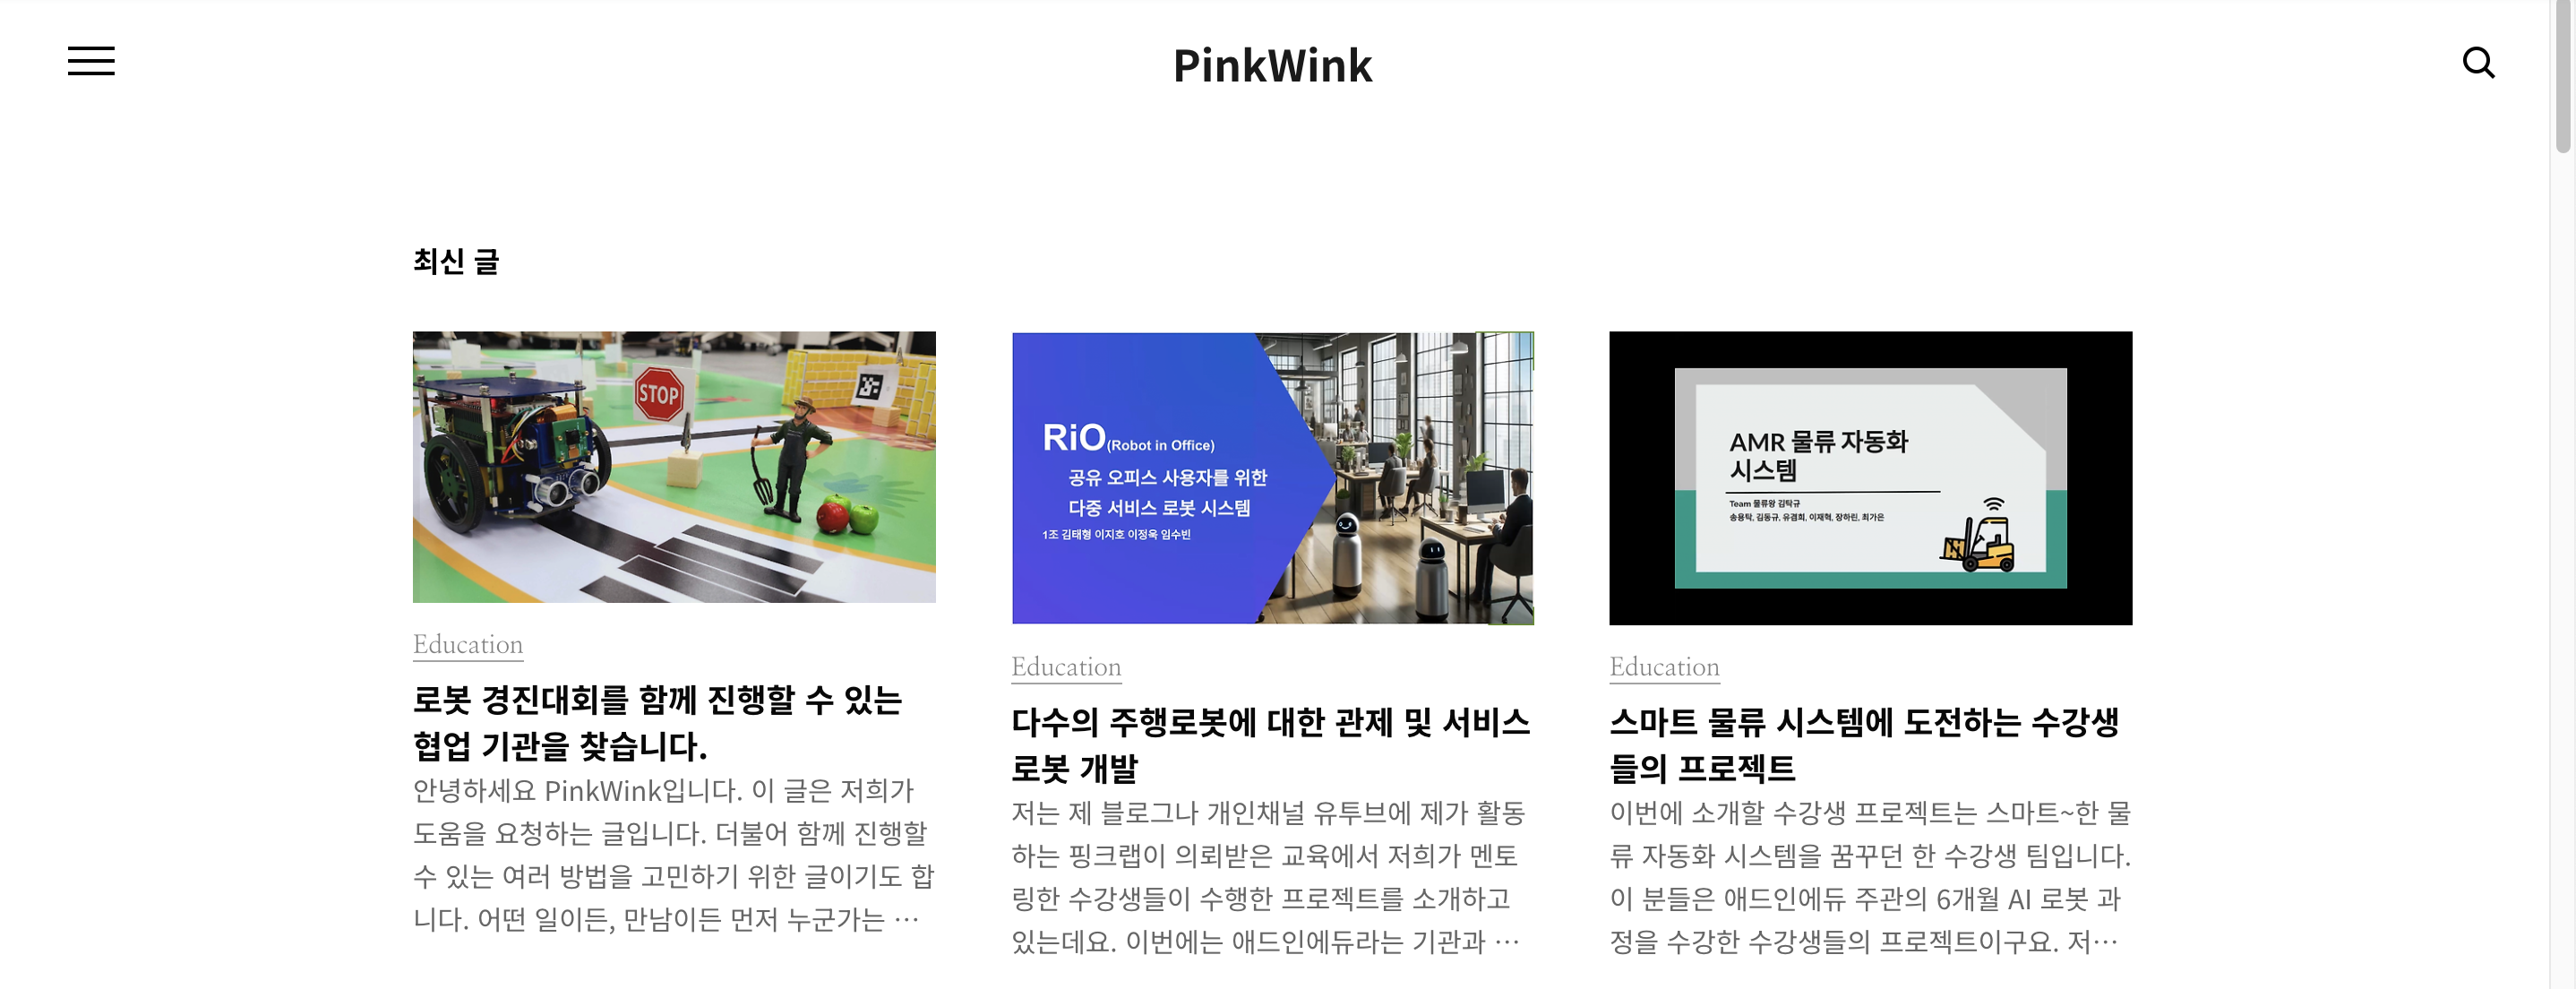

In [53]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [54]:
driver = webdriver.Chrome()
driver.get('https://pinkwink.kr')

In [73]:
# 1. 돋보기 버튼을 선태 
# driver.execute_script('document.querySelector("#header > div.search").className = "search on"')

from selenium.webdriver import ActionChains

search_tag = driver.find_element(By.CSS_SELECTOR, '.search')
action = ActionChains(driver)
action.click(search_tag)
action.perform()

In [74]:
# 2. 검색어를 입력

keyword = driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > input[type=text]')
keyword.clear()
keyword.send_keys('딥러닝')

In [75]:
# 3. 검색 버튼 클릭

search_btn = driver.find_element(By.CSS_SELECTOR, '#header > div.search.on > button')
search_btn.click()

In [77]:
driver.quit()

---

<a id="selenium-beautifulsoup"></a>
## 4. Selenium + BeautifulSoup

In [78]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [79]:
driver = webdriver.Chrome()
driver.get('https://PinkWink.kr')

<a id="현재-화면-html"></a>
### 현재 화면의 html 코드 가져오기

In [82]:
driver.page_source

'<html lang="ko" data-phocus-theme="dark"><head>\n                <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202407310101/reactive_library_fy2021.js?bust=31085793"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202407310101/show_ads_impl_fy2021.js?bust=31085793"></script><script type="text/javascript">if (!window.T) { window.T = {} }\nwindow.T.config = {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":{"id":371175,"name":"pinkwink","title":"PinkWink","isDormancy":false,"nickName":"PinkWink","status":"open","profileStatus":"normal"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"https://www.tistory.com/auth/login/?redirectUrl=https://pinkwink.kr/search/%25EB%2594%25A5%25EB%259F%25AC%25EB%258B%259D","DEFAULT_URL":"https://pinkwink.kr","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRIPTION":{"status":"none"

<a id="html-parsing"></a>
### BeautifulSoup 으로 html parsing

In [83]:
from bs4 import BeautifulSoup

req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [85]:
soup.select('.post-item')

[<div class="post-item">
 <a href="/1482">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/bFihW2/btsITD18o6N/ksVEKUMQ0AGVgaIIGkLYt0/img.png"/>
 </span>
 <span class="title">로봇 경진대회를 함께 진행할 수 있는 협업 기관을 찾습니다.</span>
 <span class="date">2024. 8. 5. 09:00</span>
 <span class="excerpt">안녕하세요 PinkWink입니다. 이 글은 저희가 도움을 요청하는 글입니다. 더불어 함께 진행할 수 있는 여러 방법을 고민하기 위한 글이기도 합니다. 어떤 일이든, 만남이든 먼저 누군가는 말을 시작해야 그 다음, 또 그 다음으로 진행이 되는 것 같으니, 저희가 이렇게 먼저 글을 작성해 보는 것입니다.^^. 제가 대표이사로 있는 PinkLAB이라는 작은 회사가 있습니다. 저희 회사에서는 꽤 재미있는 경진대회를 몇 번 진행한 적이 있습니다.핑크랩이 진행한 교육형 경진대회들저희 핑크랩은 단순히 경진대회만 진행한 적은 없고, 교육 시간을 가지고, 그 다음 경진대회를 진행한 경험을 가지고 있습니다.https://pinkwink.kr/1477 자율주행과 로봇 교육에 좋은 Pinky - 서울대 농업용 로봇 경진대회에..</span>
 </a>
 </div>,
 <div class="post-item">
 <a href="/1478">
 <span class="thum">
 <img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/tPEhJ/btsIG9AURvB/BKIp8HGOrlikQgM89wRovk/img.png"/>
 </span>
 <span class="title">스마트

In [87]:
contents = soup.select('.post-item')
len(contents)

8

In [88]:
contents[2]

<div class="post-item">
<a href="/1477">
<span class="thum">
<img alt="" src="//i1.daumcdn.net/thumb/C264x200/?fname=https://blog.kakaocdn.net/dn/lMb4g/btsIHIhDadu/WRDh4J7YfTkVDx7ubzKk4k/img.png"/>
</span>
<span class="title">자율주행과 로봇 교육에 좋은 Pinky - 서울대 농업용 로봇 경진대회에 첫 출격했습니다.</span>
<span class="date">2024. 7. 21. 09:43</span>
<span class="excerpt">저희는 아주 오래전분터 다양한 기간의 교육 프로그램을 진행한 경험이 있습니다. 블로그에 다 소개하지 못한 여러 교육들을 진행했습니다. 그런데, 그 때 마다 몇 가지 교육에서 불편함 들이 있습니다. 여러 불편함들을 해소하고 싶어서 많은 고민들을 했습니다. 그러다가 작은 로봇을 하나 만들기 시작했는데요. 정확히는 로봇의 컨텐츠를 많이 고민했습니다. 어떻게 하면 효율적으로 교육시간을 활용할 수 있을지를 고민하기 시작했습니다. 그러다가 이번 24년 여름. 서울대에서 주관하는 농업용 로봇 경진대회라는 대회를 진행하면서 이번에 만든 로봇과 그 컨텐츠를 운영하게 되었습니다.기존 주행로봇 교육의 어려움을 극복하려는 노력 기존의 주행로봇들을 진행하는데는 저희 핑크랩의 욕심이겠지만, 몇몇 아쉬움이 있었습니다. 저희가 진행..</span>
</a>
</div>